<h1 style =  "font-size:3rem;color:orange;"> Statstical Analysis</h1>

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

## Read the CSV file.

#### Importing dataset

In [2]:
dataset = pd.read_csv('toy_dataset.csv')

### Note: 
##### CSV file is read Using the pandas library and assigned in the variable called dataset

## How many data points are there?

In [3]:
dataset.shape

(150000, 6)

### Note: 
##### There are 6 datapoints in this Dataset with 150000 indexes

## Get a description for every feature (column) in the dataset. What are the names of the features? What are the possible values for categorical features? What are the intervals of the values for numerical features? Are there any missing values?

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


### Note:
##### Name of the features are => Number, City, Gender, Age Income, Illness. 
##### Categorical Features => City, Gender, Illness
##### Numeric Features => Number, Age, Income

In [6]:
city = dataset['City'].unique()
gender = dataset['Gender'].unique()
illness = dataset['Illness'].unique()
print(city, gender, illness)

['Dallas' 'New York City' 'Los Angeles' 'Mountain View' 'Boston'
 'Washington D.C.' 'San Diego' 'Austin'] ['Male' 'Female'] ['No' 'Yes']


### Note: 
#### Possible values of categorical features:
##### City => Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego, Austin
##### Gender=> Male, Female
##### Illness=> No, Yes

In [32]:
max_income =  dataset['Income'].max()
min_income =  dataset['Income'].min()
income_interval = max_income-min_income
print(income_interval)

177811.0


In [33]:
max_age =  dataset['Age'].max()
min_age =  dataset['Age'].min()
age_interval = max_age-min_age
print(age_interval)

40


### Note: 
##### Intervals of the values for Numerical features:
##### 'Income' => 177811
##### 'Age' => 40


In [5]:
missing_values = dataset.isnull().sum()
print(missing_values)

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


### Note:
##### There is no missing value in any of these features.

## Extract only the data for which Illness is No and save it in a separate CSV file, called noIllness.csv.

In [7]:
for value in illness:
    noIllness_dataset = dataset[dataset['Illness'] != value]
    
noIllness_dataset.to_csv(f"noIllness.csv", index=False)

In [8]:
noIllness_dataset.shape

(137861, 6)

### Note: 
##### There are 137861 entities in the dataset with 'No' Illness and saved in noIllness.csv

## In the noIllness data, make a plot of the Income distribution, depending on Age.

#### AGE VS INCOME Scatter plot

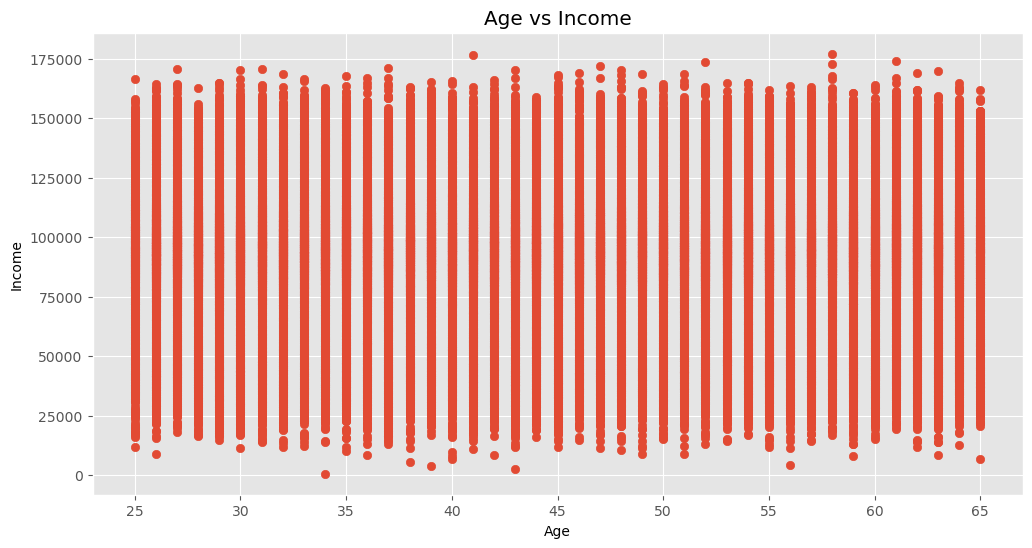

In [9]:
plt.scatter(noIllness_dataset['Age'], noIllness_dataset['Income'])

plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

#### AGE VS INCOME Histogram plot

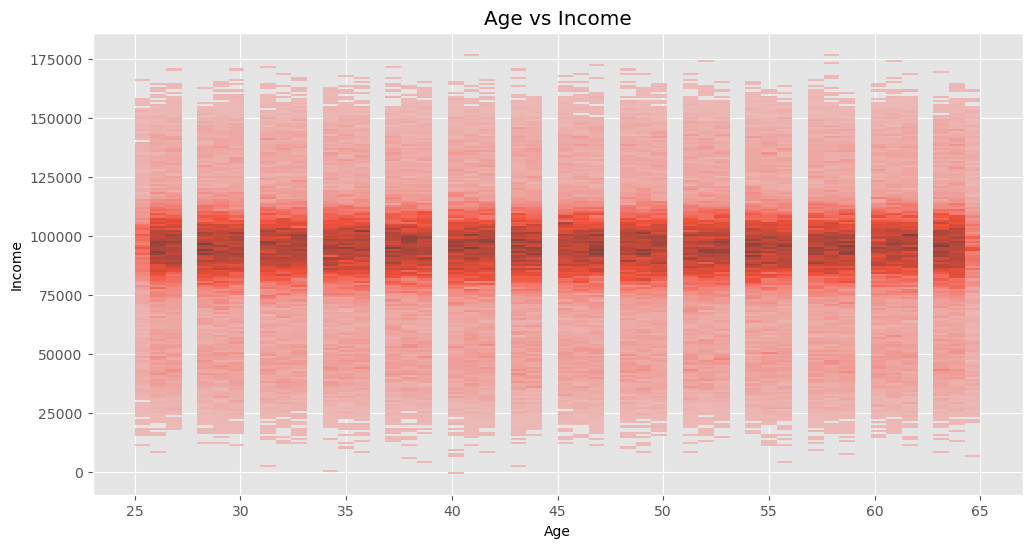

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', y='Income', data=dataset)

plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

#### AGE group VS INCOME group plot

In [23]:

def age_group(age):
    if age <= 18:
        return '0-18'
    elif age <= 35:
        return '19-35'
    elif age <= 60:
        return '36-60'
    else:
        return '61+'

dataset['AgeGroup'] = dataset['Age'].apply(age_group)

def income_group(income):
    if income <= 30000:
        return 'Low'
    elif income <= 60000:
        return 'Medium'
    else:
        return 'High'

dataset['IncomeGroup'] = dataset['Income'].apply(income_group)

dataset['Age_Income'] = dataset['Age'] * dataset['Income']

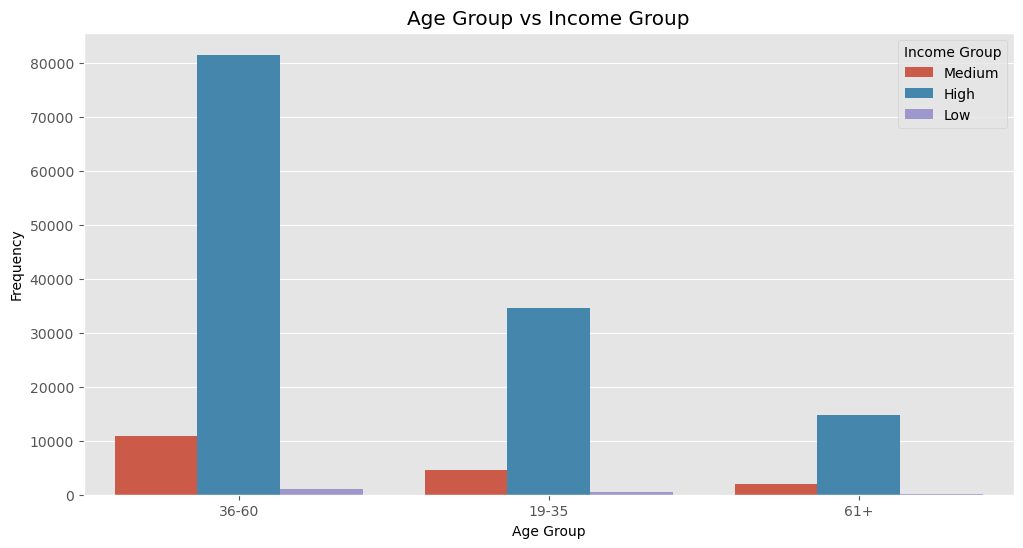

In [24]:
dataset['AgeGroup'] = dataset['Age'].apply(age_group)
dataset['IncomeGroup'] = dataset['Income'].apply(income_group)

plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='IncomeGroup', data=dataset)

plt.title('Age Group vs Income Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Income Group')

plt.show()

## In the noIllness data, remove the Illness column and perform the following transformation. Save the transformed data in a separate CSV file, called noIllnessTransformed.csv

In [11]:
droppedIllness_dataset = noIllness_dataset.drop(columns = ['Illness'], axis = 1)

### Note: 
##### Illness column removed.

In [12]:
transformed_dataset = droppedIllness_dataset.set_index(["Number"]).stack().reset_index(name = "Feature").rename(columns = {'level_2' : 'Values'})
transformed_dataset.to_csv(f"noIllnessTransformed.csv", index=False)

### Note: 
##### Dropped Illness column dataset hase been transformed as instructred and saved in noIllnessTransformed.csv

## In the original data, is there any significant difference in the income, between the different cities?

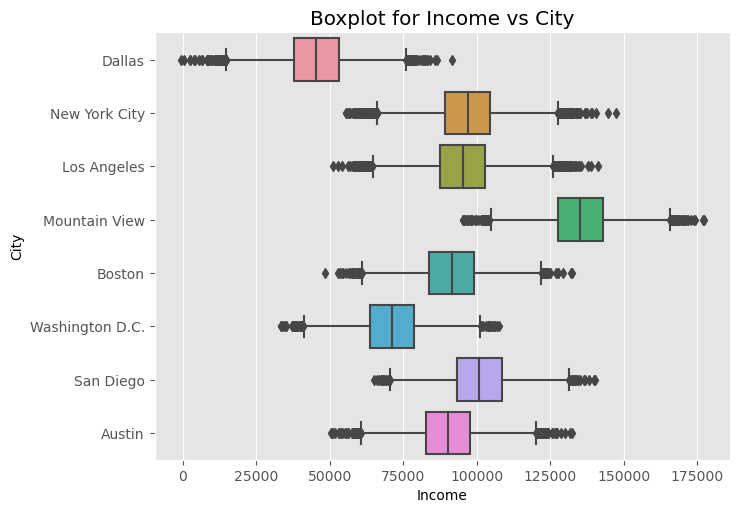

In [13]:
sns.catplot(x="Income", y="City", data=dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Income vs City")
plt.show()

### Note: 
##### From the above boxplot, we can see, there is a significant difference in income in accordance with some cities. People with Mountainview has the most income, ranged between 125000 to 150000 where as people from Dallas has lowest income which lies around 50000 or less. People from cities  like New York, Los Angeles, Boston, San Diego and Austin has almost similar income with around 100000 more or less. However people of Washington D.C. has around 75000 or less income. 

## In the original data, which of the features can be used for prediction of illness?

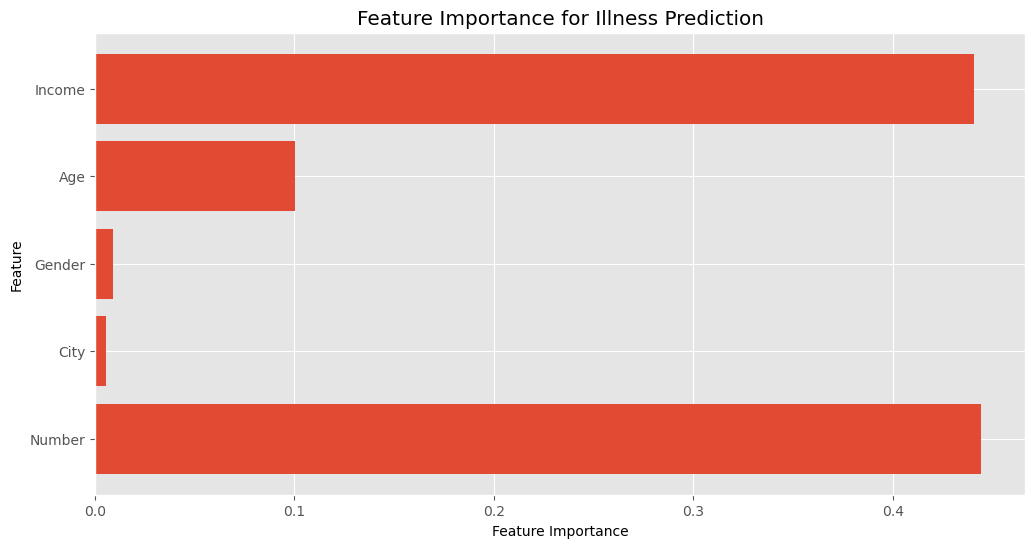

In [22]:
feature_importances = rf_classifier.feature_importances_


plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Illness Prediction')
plt.show()

### Note: 
##### From this bar graph, we can see the features that can be used for prediction of illness. Here, 'Number' and 'Income' columns have the importance to predict the Illnes followed by the 'Age' column. 'Gender' and 'City' column has the least importance to predict Illnes.

## Split the data into 80% training and 20% test set. Make sure that all the variable distributions are preserved.

### Encoding Categorical Data

In [14]:
le_gender = LabelEncoder()
le_city = LabelEncoder()

dataset['Gender'] = le_gender.fit_transform(dataset['Gender'])
dataset['City'] = le_city.fit_transform(dataset['City'])

# Matricies of features and target variable 
X = dataset.drop('Illness', axis=1)
y = dataset['Illness']


### Splitting the encoded data into training and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Note: 
##### The dataset has been splitted into 80% training data and 20% test data Where X contains all the matrices of features and y contains the target variable. Before splitting the dataset the categorical features has been encoded into numerical data by Label Encoder from scikit learn library. 

## Fit a ML model of your choice to the training data and use it to do predictions on the test set.

In [16]:
# Standardize the numerical features
scaler = StandardScaler()
X_train[['Number', 'Age', 'Income']] = scaler.fit_transform(X_train[['Number', 'Age', 'Income']])
X_test[['Number', 'Age', 'Income']] = scaler.transform(X_test[['Number', 'Age', 'Income']])


rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)


rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9186666666666666


In [21]:
print("Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest
Accuracy:  0.9186666666666666
              precision    recall  f1-score   support

          No       0.92      1.00      0.96     27623
         Yes       0.07      0.00      0.00      2377

    accuracy                           0.92     30000
   macro avg       0.49      0.50      0.48     30000
weighted avg       0.85      0.92      0.88     30000



### Note: 
##### Random Forest Classifier has been used to train the dataset for the predictions on the test set as it has provided the highest accuracy rate with restpect to Decision Tree Classifier.